In [2]:
import plotly.graph_objects as go
import numpy as np
from ipywidgets import interact

fig = go.FigureWidget()
fig.add_scatter()

xs=np.linspace(0, 6, 100)

@interact(a=(1.0, 4.0, 0.01), b=(0, 10.0, 0.01), color=['red', 'green', 'blue'])
def update(a=3.6, b=4.3, color='blue'):
    with fig.batch_update():
        scatt = fig.data[0]
        scatt.x=xs
        scatt.y=np.sin(a*xs-b)
        scatt.line.color=color

fig

interactive(children=(FloatSlider(value=3.6, description='a', max=4.0, min=1.0, step=0.01), FloatSlider(value=…

FigureWidget({
    'data': [{'line': {'color': 'blue'},
              'type': 'scatter',
              'uid': …

In [31]:
data = [np.random.rand(50),np.random.rand(50)]
import matplotlib.pyplot as plt


In [32]:
color = []

for i in range(0, len(data[0])):
    x = data[0][i]
    y = data[1][i]
    
    #print(x+y)
    if x + y < 0.6:
        color.append("red")
    else:
        color.append("blue")
    

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay


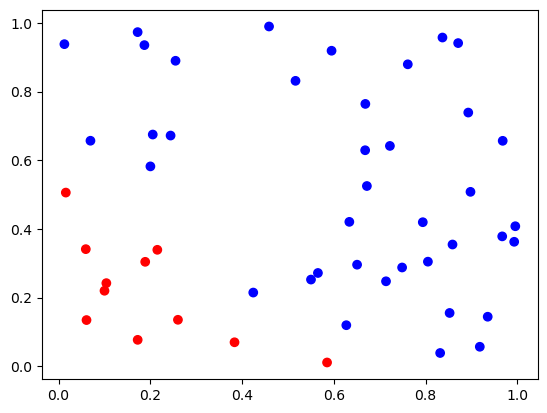

In [35]:
plt.figure()
plt.scatter(data[0], data[1],
            c=color)


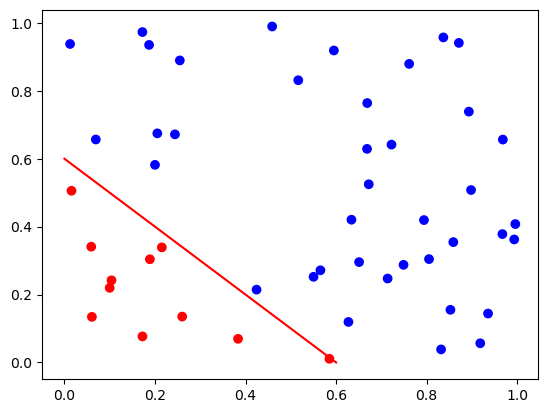

In [49]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(data[0], data[1], c=color)
line = mlines.Line2D([0.6, 0], [0, 0.6], color='red')

ax.add_line(line)
plt.show()

In [98]:
# Weights for each input to the 1st output
weight_1_1 = float(-0.85)
weight_1_2 = float(0.5)
# Weights for each input to the 2st output
weight_2_1 = float(0.6)
weight_2_2 = float(-0.4)
# Bias
bias_1, bias_2 = float(0.5), float(0)

def Classify(input_1, input_2):
    output_1 = input_1 * weight_1_1 + input_2 * weight_2_1 + bias_1
    output_2 = input_1 * weight_1_2 + input_2 * weight_2_2 + bias_2

    if output_1 > output_2:
        return "red"
    else:
        return "blue"





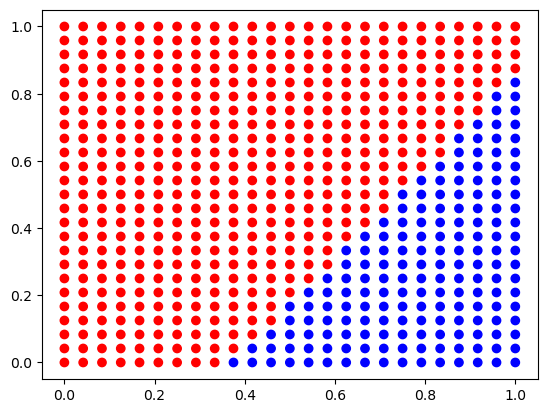

In [99]:
nx, ny = (25, 25)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

xv_re = xv.reshape(1,625)
yv_re = yv.reshape(1,625)

testColor = []

for i in range(0, len(xv_re[0])):
    testColor.append(Classify(xv_re[0][i], yv_re[0][i]))


plt.scatter(xv_re,yv_re, color = testColor)

In [1]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

np.random.seed(0)
'''
X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]
'''




class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) # randomly generates wheigts
        self.biases = np.zeros((1, n_neurons)) # zero biases
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases # computes dot product between weights and inputs
    def backward(self, dvalues):
        # Gradient on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # gradient on valeus
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
    def backward(self, dvalues):
        self.dinputs=dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs -  np.max(inputs, axis=1, keepdims=True))
        probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probs
    def backward(self, dvalues):
    # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
            np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
            single_dvalues)

        
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues

        self.dinputs = self.dinputs / samples


class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
        # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

'''
layer1 = Layer_Dense(2, 5)  
activation1 = Activation_ReLU()

layer1.forward(X)
#print(layer1.output)
activation1.forward(layer1.output)
#print(activation1.output)
'''


        

'\nlayer1 = Layer_Dense(2, 5)  \nactivation1 = Activation_ReLU()\n\nlayer1.forward(X)\n#print(layer1.output)\nactivation1.forward(layer1.output)\n#print(activation1.output)\n'

In [5]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(learning_rate=.85)

for epoch in range(10001):
    dense1.forward(X)

    activation1.forward(dense1.output)

    dense2.forward(activation1.output)

    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    #print('acc:', accuracy)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


epoch: 0, acc: 0.350, loss: 1.099
epoch: 100, acc: 0.450, loss: 1.061
epoch: 200, acc: 0.473, loss: 1.054
epoch: 300, acc: 0.463, loss: 1.052
epoch: 400, acc: 0.463, loss: 1.052
epoch: 500, acc: 0.457, loss: 1.051
epoch: 600, acc: 0.453, loss: 1.050
epoch: 700, acc: 0.447, loss: 1.049
epoch: 800, acc: 0.450, loss: 1.046
epoch: 900, acc: 0.463, loss: 1.042
epoch: 1000, acc: 0.460, loss: 1.035
epoch: 1100, acc: 0.473, loss: 1.026
epoch: 1200, acc: 0.500, loss: 1.016
epoch: 1300, acc: 0.520, loss: 1.005
epoch: 1400, acc: 0.547, loss: 0.992
epoch: 1500, acc: 0.440, loss: 0.987
epoch: 1600, acc: 0.453, loss: 0.976
epoch: 1700, acc: 0.527, loss: 0.969
epoch: 1800, acc: 0.467, loss: 0.972
epoch: 1900, acc: 0.457, loss: 0.961
epoch: 2000, acc: 0.483, loss: 0.950
epoch: 2100, acc: 0.483, loss: 0.943
epoch: 2200, acc: 0.530, loss: 0.980
epoch: 2300, acc: 0.483, loss: 0.948
epoch: 2400, acc: 0.520, loss: 0.945
epoch: 2500, acc: 0.460, loss: 0.970
epoch: 2600, acc: 0.467, loss: 0.946
epoch: 2700, 